# Movie Features Project

This project contains an extensive Exploratory data analysis on the stats of different films.  Features explored inclued genre of film, directors, budgets, grosses, ext.


**IMPORTANT NOTE** This is not a predictive project, it is my first data analytics project where I am turning raw data into visualizations in order to tell a story. 

Exploratory data analysis is always a crucial first step in creating a project.

## Imports

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [90]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [91]:
pwd

'C:\\Users\\ozbun\\projects\\Movie_EDA'

## Data Cleaning

### Who is Who

In [92]:
name_basics_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
name_basics_df.head()


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [93]:
name_basics_df.shape

(606648, 6)

In [94]:
# So many of our points of interest have not died yet,
# so lets get rid of this column especially since it is the highest numbers of missing values.

name_basics_df.isna().sum()

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [95]:
name_basics_df = name_basics_df.drop(columns = 'death_year')

In [96]:
name_basics_df.head()

,nconst,primary_name,birth_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [97]:
name_basics_df = name_basics_df.dropna()

In [98]:
name_basics_df.shape

(80348, 5)

In [99]:
name_basics_df.isna().sum()

nconst                0
primary_name          0
birth_year            0
primary_profession    0
known_for_titles      0
dtype: int64

In [100]:
name_basics_df = (name_basics_df.set_index(['nconst', 'primary_name','birth_year'])
   .stack()
   .str.split(',', expand=True)
   .stack()
   .unstack(-2)
   .reset_index(-1, drop=True)
   .reset_index()
)

In [101]:
name_basics_df.head()

,nconst,primary_name,birth_year,primary_profession,known_for_titles
0,nm0000002,Lauren Bacall,1924.0,actress,tt0038355
1,nm0000002,Lauren Bacall,1924.0,soundtrack,tt0117057
2,nm0000002,Lauren Bacall,1924.0,NaN,tt0071877
3,nm0000002,Lauren Bacall,1924.0,NaN,tt0037382
4,nm0000003,Brigitte Bardot,1934.0,actress,tt0049189


In [102]:
name_basics_df.isna().sum()

nconst                     0
primary_name               0
birth_year                 0
primary_profession    131122
known_for_titles        1319
dtype: int64

In [103]:
name_basics_df = name_basics_df.dropna()

In [104]:
name_basics_df.isna().sum()

nconst                0
primary_name          0
birth_year            0
primary_profession    0
known_for_titles      0
dtype: int64

In [105]:
name_basics_df.shape

(181188, 5)

In [106]:
name_basics_df = name_basics_df.rename({'known_for_titles': 'tconst'}, axis='columns')

In [107]:
name_basics_df.head()

,nconst,primary_name,birth_year,primary_profession,tconst
0,nm0000002,Lauren Bacall,1924.0,actress,tt0038355
1,nm0000002,Lauren Bacall,1924.0,soundtrack,tt0117057
4,nm0000003,Brigitte Bardot,1934.0,actress,tt0049189
5,nm0000003,Brigitte Bardot,1934.0,soundtrack,tt0057345
6,nm0000003,Brigitte Bardot,1934.0,producer,tt0054452


In [108]:
name_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181188 entries, 0 to 313626
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              181188 non-null  object 
 1   primary_name        181188 non-null  object 
 2   birth_year          181188 non-null  float64
 3   primary_profession  181188 non-null  object 
 4   tconst              181188 non-null  object 
dtypes: float64(1), object(4)
memory usage: 8.3+ MB


### Ratings

In [109]:
imdb_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [110]:
imdb_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### Title Basics

In [111]:
title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [112]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### Movie Grosses and Budgets

In [113]:
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [114]:
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [115]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Joining Data Sets

In [116]:
#Here I am joining the budget and basics with tconst section because it will allow me to join the budget to the ratings by the tconst column.

In [117]:
budget_tconst = pd.merge(title_basics_df, movie_budgets_df , left_on= 'primary_title', right_on= 'movie', how = 'right')

In [118]:
budget_tconst.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,NaN,NaN,NaN,NaN,NaN,NaN,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [119]:
#Searching for NaN values.

In [120]:
budget_tconst.isna().sum()

tconst               3406
primary_title        3406
original_title       3407
start_year           3406
runtime_minutes      3893
genres               3478
id                      0
release_date            0
movie                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
dtype: int64

In [121]:
#Dropping those values

In [122]:
budget_tconst.dropna()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
6,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
...,...,...,...,...,...,...,...,...,...,...,...,...
7204,tt6619196,Clean,Clean,2017.0,70.0,"Comedy,Drama,Horror",67,"Apr 28, 2006",Clean,"$10,000","$138,711","$138,711"
7205,tt1872026,Cure,Cure,2011.0,93.0,Drama,68,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596"
7211,tt1880418,Newlyweds,Newlyweds,2011.0,95.0,"Comedy,Drama",73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584"
7216,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",78,"Dec 31, 2018",Red 11,"$7,000",$0,$0


In [123]:
#Joining this table with the ratings table via the tconst column.

In [124]:
df = pd.merge(budget_tconst,  imdb_ratings_df, on=['tconst'])

In [125]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
0,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",6.1,43
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624
2,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6.0,24451
3,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",7.3,665594
4,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",8.5,670926


In [126]:
project1_df = pd.merge(df, name_basics_df, on=['tconst'])

In [127]:
project1_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,nconst,primary_name,birth_year,primary_profession
0,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624,nm0004851,Penélope Cruz,1974.0,actress
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624,nm0046087,Jennifer Badger,1976.0,stunts
2,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624,nm0263740,Steve Evets,1960.0,actor
3,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624,nm0273797,Sebastian Armesto,1982.0,assistant_director
4,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",6.6,447624,nm0573618,Kevin McNally,1956.0,actor


In [128]:
project1_df.shape

(10992, 18)

## Missing Values

In [129]:
#Checking for NaN values.

In [130]:
project1_df.isna().sum()

tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes       32
genres                 2
id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
averagerating          0
numvotes               0
nconst                 0
primary_name           0
birth_year             0
primary_profession     0
dtype: int64

In [131]:
#Again dropping those values

In [132]:
project1_df = project1_df.dropna()

In [133]:
project1_df.isna().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres                0
id                    0
release_date          0
movie                 0
production_budget     0
domestic_gross        0
worldwide_gross       0
averagerating         0
numvotes              0
nconst                0
primary_name          0
birth_year            0
primary_profession    0
dtype: int64

In [134]:
#Nan values gone, checking for types on columns that should be integers.

In [135]:
project1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10958 entries, 0 to 10991
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tconst              10958 non-null  object 
 1   primary_title       10958 non-null  object 
 2   original_title      10958 non-null  object 
 3   start_year          10958 non-null  float64
 4   runtime_minutes     10958 non-null  float64
 5   genres              10958 non-null  object 
 6   id                  10958 non-null  int64  
 7   release_date        10958 non-null  object 
 8   movie               10958 non-null  object 
 9   production_budget   10958 non-null  object 
 10  domestic_gross      10958 non-null  object 
 11  worldwide_gross     10958 non-null  object 
 12  averagerating       10958 non-null  float64
 13  numvotes            10958 non-null  int64  
 14  nconst              10958 non-null  object 
 15  primary_name        10958 non-null  object 
 16  birt

In [136]:
project1_df.shape

(10958, 18)

In [137]:
#Conversion to integers:

In [138]:
def column_conversion(df, col):
    df[col] = df[col].str.replace("$","").str.replace(",","").astype('int64')
    return df

In [139]:
column_to_convert = ['production_budget','domestic_gross','worldwide_gross']

for col in column_to_convert:
    project1_df = column_conversion(project1_df, col)

In [140]:
#More cleaning...

In [141]:
project1_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,nconst,primary_name,birth_year,primary_profession
0,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624,nm0004851,Penélope Cruz,1974.0,actress
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624,nm0046087,Jennifer Badger,1976.0,stunts
2,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624,nm0263740,Steve Evets,1960.0,actor
3,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624,nm0273797,Sebastian Armesto,1982.0,assistant_director
4,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624,nm0573618,Kevin McNally,1956.0,actor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,tt1716760,Raymond Did It,Raymond Did It,2011.0,83.0,Horror,32,"Feb 11, 2011",Raymond Did It,40000,3632,3632,3.3,211,nm3171405,Robert J. Williams,1986.0,editor
10988,tt1492841,Foreign Letters,Foreign Letters,2012.0,99.0,"Comedy,Drama",33,"Mar 31, 2012",Foreign Letters,40000,0,0,6.9,180,nm0858008,Ela Thier,1971.0,writer
10989,tt1945044,Exeter,Exeter,2015.0,91.0,"Horror,Mystery,Thriller",49,"Sep 1, 2015",Exeter,25000,0,489792,4.5,5156,nm1885051,Nick Nicotera,1981.0,editor
10990,tt2309562,Ten,Ten,2013.0,118.0,Drama,51,"Apr 21, 2015",Ten,25000,0,0,5.5,31,nm2793783,Colin Burt Vidler,1970.0,actor


In [142]:
project1_df.drop_duplicates(subset=['release_date', 'movie','primary_title', 'production_budget'])
project1_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,nconst,primary_name,birth_year,primary_profession
0,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624,nm0004851,Penélope Cruz,1974.0,actress
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624,nm0046087,Jennifer Badger,1976.0,stunts
2,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624,nm0263740,Steve Evets,1960.0,actor
3,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624,nm0273797,Sebastian Armesto,1982.0,assistant_director
4,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624,nm0573618,Kevin McNally,1956.0,actor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,tt1716760,Raymond Did It,Raymond Did It,2011.0,83.0,Horror,32,"Feb 11, 2011",Raymond Did It,40000,3632,3632,3.3,211,nm3171405,Robert J. Williams,1986.0,editor
10988,tt1492841,Foreign Letters,Foreign Letters,2012.0,99.0,"Comedy,Drama",33,"Mar 31, 2012",Foreign Letters,40000,0,0,6.9,180,nm0858008,Ela Thier,1971.0,writer
10989,tt1945044,Exeter,Exeter,2015.0,91.0,"Horror,Mystery,Thriller",49,"Sep 1, 2015",Exeter,25000,0,489792,4.5,5156,nm1885051,Nick Nicotera,1981.0,editor
10990,tt2309562,Ten,Ten,2013.0,118.0,Drama,51,"Apr 21, 2015",Ten,25000,0,0,5.5,31,nm2793783,Colin Burt Vidler,1970.0,actor


## Feature Engineering

In [143]:
project1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10958 entries, 0 to 10991
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tconst              10958 non-null  object 
 1   primary_title       10958 non-null  object 
 2   original_title      10958 non-null  object 
 3   start_year          10958 non-null  float64
 4   runtime_minutes     10958 non-null  float64
 5   genres              10958 non-null  object 
 6   id                  10958 non-null  int64  
 7   release_date        10958 non-null  object 
 8   movie               10958 non-null  object 
 9   production_budget   10958 non-null  int64  
 10  domestic_gross      10958 non-null  int64  
 11  worldwide_gross     10958 non-null  int64  
 12  averagerating       10958 non-null  float64
 13  numvotes            10958 non-null  int64  
 14  nconst              10958 non-null  object 
 15  primary_name        10958 non-null  object 
 16  birt

In [144]:
project1_df['month'] = project1_df['release_date'].str[0:3]
project1_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,nconst,primary_name,birth_year,primary_profession,month
0,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624,nm0004851,Penélope Cruz,1974.0,actress,May
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624,nm0046087,Jennifer Badger,1976.0,stunts,May
2,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624,nm0263740,Steve Evets,1960.0,actor,May
3,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624,nm0273797,Sebastian Armesto,1982.0,assistant_director,May
4,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,6.6,447624,nm0573618,Kevin McNally,1956.0,actor,May


In [145]:
project1_df['month_inorder'] = pd.DatetimeIndex(pd.to_datetime(project1_df['month'], format='%b')).month
project1_df = project1_df.sort_values('month_inorder', ascending = False)
project1_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes,nconst,primary_name,birth_year,primary_profession,month,month_inorder
10991,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",78,"Dec 31, 2018",Red 11,7000,0,0,5.6,43,nm1897406,Racer Rodriguez,1997.0,stunts,Dec,12
5043,tt1091191,Lone Survivor,Lone Survivor,2013.0,121.0,"Action,Biography,Drama",84,"Dec 25, 2013",Lone Survivor,40000000,125095601,149804632,7.5,246641,nm1846124,Ali Suliman,1977.0,producer,Dec,12
5045,tt1091191,Lone Survivor,Lone Survivor,2013.0,121.0,"Action,Biography,Drama",84,"Dec 25, 2013",Lone Survivor,40000000,125095601,149804632,7.5,246641,nm3181865,Frank Powers,1975.0,producer,Dec,12
5046,tt1091191,Lone Survivor,Lone Survivor,2013.0,121.0,"Action,Biography,Drama",84,"Dec 25, 2013",Lone Survivor,40000000,125095601,149804632,7.5,246641,nm3899377,John Quintana,1989.0,producer,Dec,12
5232,tt1694020,The Guilt Trip,The Guilt Trip,2012.0,95.0,"Comedy,Drama",59,"Dec 19, 2012",The Guilt Trip,40000000,37134215,41294674,5.8,33702,nm0235092,Jackson Douglas,1969.0,director,Dec,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10091,tt3103166,The Masked Saint,The Masked Saint,2016.0,105.0,"Action,Biography,Crime",19,"Jan 8, 2016",The Masked Saint,3500000,182695,182695,4.6,559,nm2156926,David Anselmo,1979.0,actor,Jan,1
5735,tt3717252,Underworld: Blood Wars,Underworld: Blood Wars,2016.0,91.0,"Action,Adventure,Fantasy",91,"Jan 6, 2017",Underworld: Blood Wars,35000000,30353973,81209222,5.8,62942,nm0002999,Richard S. Wright,1960.0,production_manager,Jan,1
5736,tt3717252,Underworld: Blood Wars,Underworld: Blood Wars,2016.0,91.0,"Action,Adventure,Fantasy",91,"Jan 6, 2017",Underworld: Blood Wars,35000000,30353973,81209222,5.8,62942,nm0580014,Tobias Menzies,1974.0,soundtrack,Jan,1
5737,tt3717252,Underworld: Blood Wars,Underworld: Blood Wars,2016.0,91.0,"Action,Adventure,Fantasy",91,"Jan 6, 2017",Underworld: Blood Wars,35000000,30353973,81209222,5.8,62942,nm0910800,Michael Wandmacher,1967.0,soundtrack,Jan,1


In [146]:
project1_df['genres_split'] = project1_df['genres'].map(lambda x: x.split(",") if x else x)
project1_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,...,worldwide_gross,averagerating,numvotes,nconst,primary_name,birth_year,primary_profession,month,month_inorder,genres_split
10991,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",78,"Dec 31, 2018",Red 11,7000,...,0,5.6,43,nm1897406,Racer Rodriguez,1997.0,stunts,Dec,12,"[Horror, Sci-Fi, Thriller]"
5043,tt1091191,Lone Survivor,Lone Survivor,2013.0,121.0,"Action,Biography,Drama",84,"Dec 25, 2013",Lone Survivor,40000000,...,149804632,7.5,246641,nm1846124,Ali Suliman,1977.0,producer,Dec,12,"[Action, Biography, Drama]"
5045,tt1091191,Lone Survivor,Lone Survivor,2013.0,121.0,"Action,Biography,Drama",84,"Dec 25, 2013",Lone Survivor,40000000,...,149804632,7.5,246641,nm3181865,Frank Powers,1975.0,producer,Dec,12,"[Action, Biography, Drama]"
5046,tt1091191,Lone Survivor,Lone Survivor,2013.0,121.0,"Action,Biography,Drama",84,"Dec 25, 2013",Lone Survivor,40000000,...,149804632,7.5,246641,nm3899377,John Quintana,1989.0,producer,Dec,12,"[Action, Biography, Drama]"
5232,tt1694020,The Guilt Trip,The Guilt Trip,2012.0,95.0,"Comedy,Drama",59,"Dec 19, 2012",The Guilt Trip,40000000,...,41294674,5.8,33702,nm0235092,Jackson Douglas,1969.0,director,Dec,12,"[Comedy, Drama]"


In [147]:
all_genres = set()
for genres in project1_df['genres_split']:
    if genres:
        all_genres.update(genres)

In [148]:
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [149]:
project1_df['1_genre'] = project1_df['genres_split'].map(lambda x: x[0])
project1_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,...,averagerating,numvotes,nconst,primary_name,birth_year,primary_profession,month,month_inorder,genres_split,1_genre
10991,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",78,"Dec 31, 2018",Red 11,7000,...,5.6,43,nm1897406,Racer Rodriguez,1997.0,stunts,Dec,12,"[Horror, Sci-Fi, Thriller]",Horror
5043,tt1091191,Lone Survivor,Lone Survivor,2013.0,121.0,"Action,Biography,Drama",84,"Dec 25, 2013",Lone Survivor,40000000,...,7.5,246641,nm1846124,Ali Suliman,1977.0,producer,Dec,12,"[Action, Biography, Drama]",Action
5045,tt1091191,Lone Survivor,Lone Survivor,2013.0,121.0,"Action,Biography,Drama",84,"Dec 25, 2013",Lone Survivor,40000000,...,7.5,246641,nm3181865,Frank Powers,1975.0,producer,Dec,12,"[Action, Biography, Drama]",Action
5046,tt1091191,Lone Survivor,Lone Survivor,2013.0,121.0,"Action,Biography,Drama",84,"Dec 25, 2013",Lone Survivor,40000000,...,7.5,246641,nm3899377,John Quintana,1989.0,producer,Dec,12,"[Action, Biography, Drama]",Action
5232,tt1694020,The Guilt Trip,The Guilt Trip,2012.0,95.0,"Comedy,Drama",59,"Dec 19, 2012",The Guilt Trip,40000000,...,5.8,33702,nm0235092,Jackson Douglas,1969.0,director,Dec,12,"[Comedy, Drama]",Comedy


In [150]:
project1_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,...,averagerating,numvotes,nconst,primary_name,birth_year,primary_profession,month,month_inorder,genres_split,1_genre
10991,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",78,"Dec 31, 2018",Red 11,7000,...,5.6,43,nm1897406,Racer Rodriguez,1997.0,stunts,Dec,12,"[Horror, Sci-Fi, Thriller]",Horror
5043,tt1091191,Lone Survivor,Lone Survivor,2013.0,121.0,"Action,Biography,Drama",84,"Dec 25, 2013",Lone Survivor,40000000,...,7.5,246641,nm1846124,Ali Suliman,1977.0,producer,Dec,12,"[Action, Biography, Drama]",Action
5045,tt1091191,Lone Survivor,Lone Survivor,2013.0,121.0,"Action,Biography,Drama",84,"Dec 25, 2013",Lone Survivor,40000000,...,7.5,246641,nm3181865,Frank Powers,1975.0,producer,Dec,12,"[Action, Biography, Drama]",Action
5046,tt1091191,Lone Survivor,Lone Survivor,2013.0,121.0,"Action,Biography,Drama",84,"Dec 25, 2013",Lone Survivor,40000000,...,7.5,246641,nm3899377,John Quintana,1989.0,producer,Dec,12,"[Action, Biography, Drama]",Action
5232,tt1694020,The Guilt Trip,The Guilt Trip,2012.0,95.0,"Comedy,Drama",59,"Dec 19, 2012",The Guilt Trip,40000000,...,5.8,33702,nm0235092,Jackson Douglas,1969.0,director,Dec,12,"[Comedy, Drama]",Comedy


In [151]:
features = project1_df.columns.tolist()
print(features)

def get_number_of_elements(list):
    count = 0
    for element in list:
        count += 1
    return count

print('Number of features:', get_number_of_elements(features))

['tconst', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'averagerating', 'numvotes', 'nconst', 'primary_name', 'birth_year', 'primary_profession', 'month', 'month_inorder', 'genres_split', '1_genre']
Number of features: 22


## Remove outliers

In [152]:
from scipy.stats import zscore
project1_df['z_score'] = abs(zscore(project1_df['worldwide_gross']))
project1_df = project1_df[(project1_df['z_score'] <= 3)]

In [153]:
project1_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,...,numvotes,nconst,primary_name,birth_year,primary_profession,month,month_inorder,genres_split,1_genre,z_score
10991,tt7837402,Red 11,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller",78,"Dec 31, 2018",Red 11,7000,...,43,nm1897406,Racer Rodriguez,1997.0,stunts,Dec,12,"[Horror, Sci-Fi, Thriller]",Horror,0.730223
5043,tt1091191,Lone Survivor,Lone Survivor,2013.0,121.0,"Action,Biography,Drama",84,"Dec 25, 2013",Lone Survivor,40000000,...,246641,nm1846124,Ali Suliman,1977.0,producer,Dec,12,"[Action, Biography, Drama]",Action,0.253960
5045,tt1091191,Lone Survivor,Lone Survivor,2013.0,121.0,"Action,Biography,Drama",84,"Dec 25, 2013",Lone Survivor,40000000,...,246641,nm3181865,Frank Powers,1975.0,producer,Dec,12,"[Action, Biography, Drama]",Action,0.253960
5046,tt1091191,Lone Survivor,Lone Survivor,2013.0,121.0,"Action,Biography,Drama",84,"Dec 25, 2013",Lone Survivor,40000000,...,246641,nm3899377,John Quintana,1989.0,producer,Dec,12,"[Action, Biography, Drama]",Action,0.253960
5232,tt1694020,The Guilt Trip,The Guilt Trip,2012.0,95.0,"Comedy,Drama",59,"Dec 19, 2012",The Guilt Trip,40000000,...,33702,nm0235092,Jackson Douglas,1969.0,director,Dec,12,"[Comedy, Drama]",Comedy,0.598938


## Data Exploration

### Initial Exploration

array([[<AxesSubplot:title={'center':'start_year'}>,
        <AxesSubplot:title={'center':'runtime_minutes'}>,
        <AxesSubplot:title={'center':'id'}>],
       [<AxesSubplot:title={'center':'production_budget'}>,
        <AxesSubplot:title={'center':'domestic_gross'}>,
        <AxesSubplot:title={'center':'worldwide_gross'}>],
       [<AxesSubplot:title={'center':'averagerating'}>,
        <AxesSubplot:title={'center':'numvotes'}>,
        <AxesSubplot:title={'center':'birth_year'}>],
       [<AxesSubplot:title={'center':'month_inorder'}>,
        <AxesSubplot:title={'center':'z_score'}>, <AxesSubplot:>]],
      dtype=object)

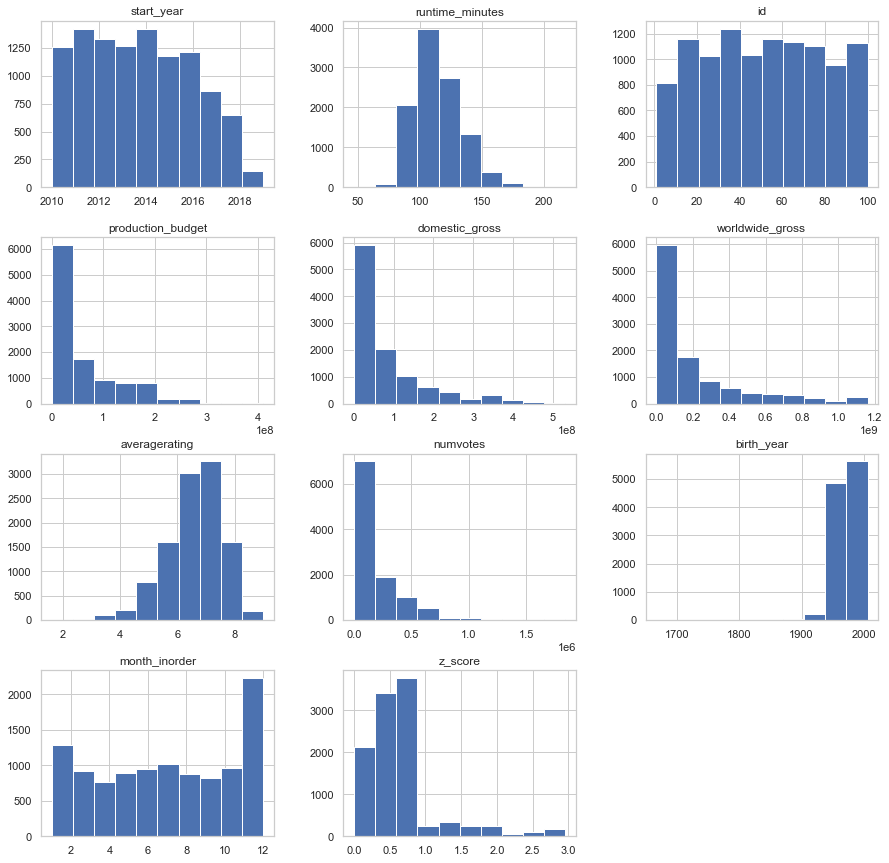

In [154]:
project1_df.hist(figsize=(15,15))

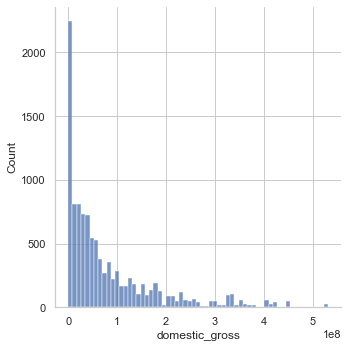

In [242]:
sns.displot(data = project1_df, x="domestic_gross")

### Question 1

Which departments are the most influential on films that grossed more than $30,000,000 domestically?
Although these are considered outliers more than likely, a major production company will be concerned with the cash cows.
It is important to note that as I go through and look at the people and departments that were associated with high grossing films, keep in mind that **correlation does NOT mean causation**.  

That being said this can give us some initial insight on the major players in big budget films.

In [264]:
df_filtered = project1_df[project1_df['worldwide_gross'] >= 400000000]

In [265]:
df_filtered.shape

(1845, 23)

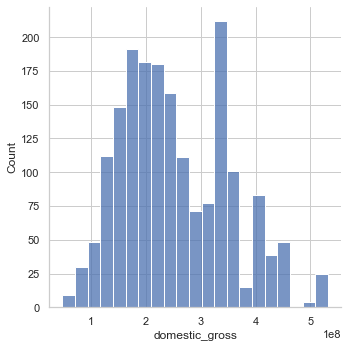

In [266]:
sns.displot(data = df_filtered, x="domestic_gross")

In [256]:
df_filtered['primary_profession'].unique()

array(['producer', 'actor', 'composer', 'director', 'music_department',
       'soundtrack', 'camera_department', 'actress', 'stunts', 'writer',
       'editor', 'visual_effects', 'cinematographer',
       'production_manager', 'location_management', 'miscellaneous',
       'costume_department', 'art_department', 'executive',
       'art_director', 'sound_department', 'editorial_department',
       'casting_director', 'production_designer', 'assistant_director',
       'animation_department', 'transportation_department',
       'casting_department', 'costume_designer', 'manager',
       'make_up_department', 'talent_agent'], dtype=object)

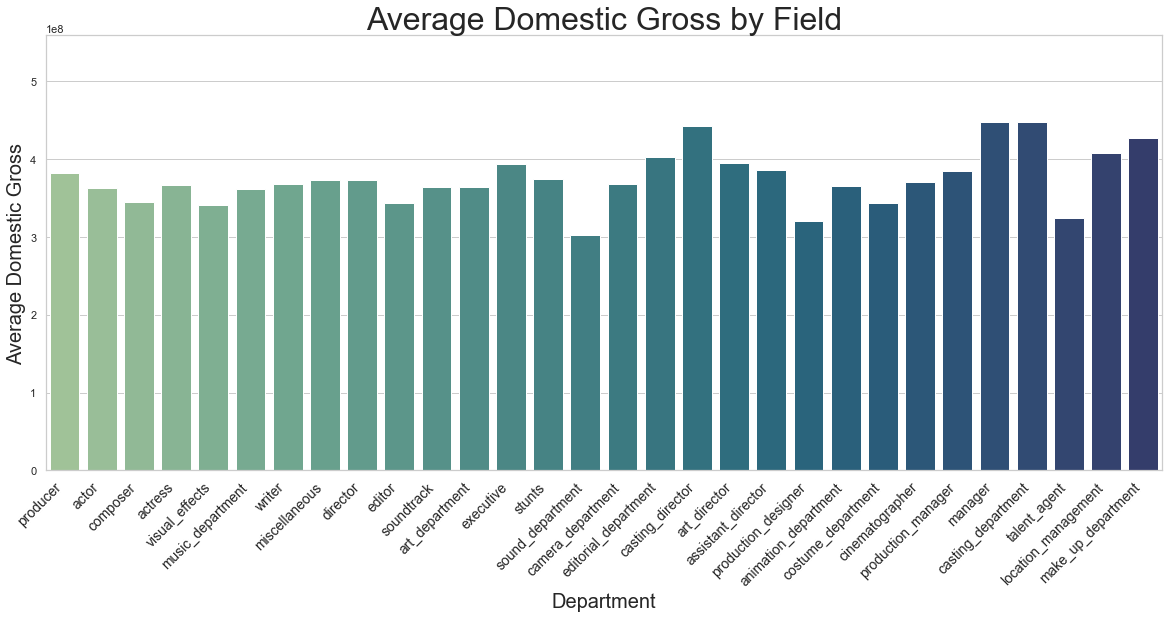

In [192]:
# I am hoping this tells us something about the presence of each department per film grosses.

fig, ax = plt.subplots(figsize=(20,8))

g = sns.barplot(data=df_filtered, x= 'primary_profession', y='domestic_gross', palette = 'crest' )
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax.lines = []

plt.xlabel("Department", fontsize=20)
plt.ylabel("Average Domestic Gross", fontsize=20)
plt.title("Average Domestic Gross by Field", fontsize=32)
plt.tight_layout
plt.show()

In [193]:
new_df = df_filtered[df_filtered['primary_profession'] == 'visual_effects']

In [194]:
new_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,...,numvotes,nconst,primary_name,birth_year,primary_profession,month,month_inorder,genres_split,1_genre,z_score
1524,tt1477834,Aquaman,Aquaman,2018.0,143.0,"Action,Adventure,Fantasy",36,"Dec 21, 2018",Aquaman,160000000,...,263328,nm0382743,Kevin Hickman,1971.0,visual_effects,Dec,12,"[Action, Adventure, Fantasy]",Action,2.916015
1536,tt1477834,Aquaman,Aquaman,2018.0,143.0,"Action,Adventure,Fantasy",36,"Dec 21, 2018",Aquaman,160000000,...,263328,nm3346310,Chris Dwyer,1985.0,visual_effects,Dec,12,"[Action, Adventure, Fantasy]",Action,2.916015
1015,tt3501632,Thor: Ragnarok,Thor: Ragnarok,2017.0,130.0,"Action,Adventure,Comedy",82,"Nov 3, 2017",Thor: Ragnarok,180000000,...,482995,nm1653021,Justin Talley,1983.0,visual_effects,Nov,11,"[Action, Adventure, Comedy]",Action,1.962519
676,tt1074638,Skyfall,Skyfall,2012.0,143.0,"Action,Adventure,Thriller",52,"Nov 8, 2012",Skyfall,200000000,...,592221,nm0003445,Steven Begg,1958.0,visual_effects,Nov,11,"[Action, Adventure, Thriller]",Action,2.800394
1302,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014.0,121.0,"Action,Adventure,Comedy",14,"Aug 1, 2014",Guardians of the Galaxy,170000000,...,948394,nm4457305,Alessandro Sabbioni,1983.0,visual_effects,Aug,8,"[Action, Adventure, Comedy]",Action,1.720540


In [195]:
new_df.shape

(6, 23)

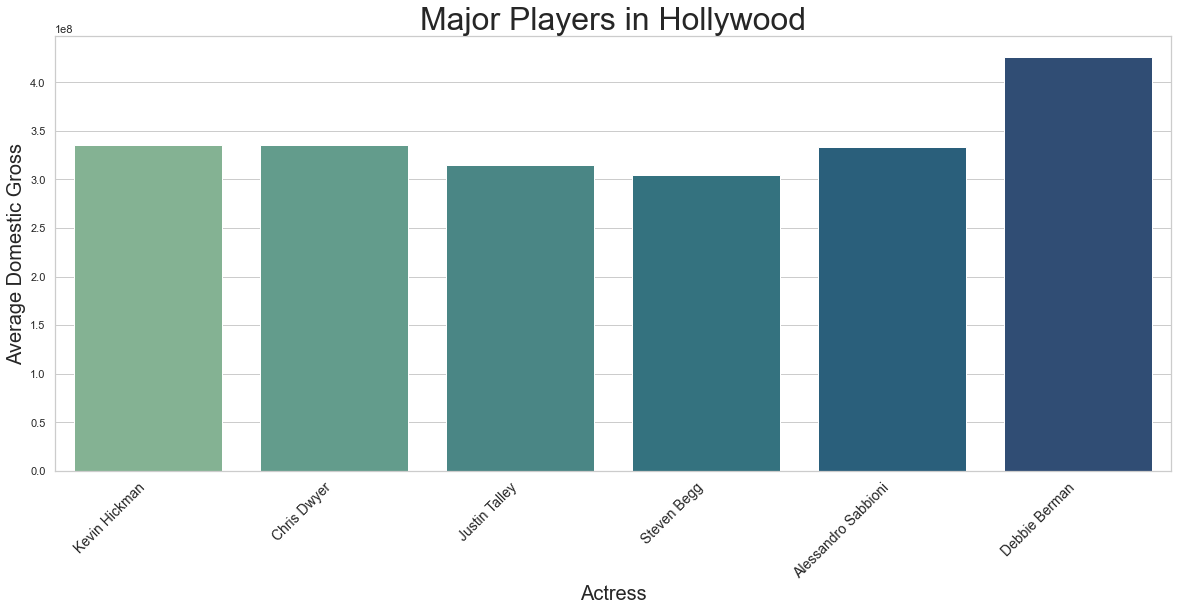

In [196]:
fig, ax = plt.subplots(figsize=(20,8))

g = sns.barplot(data=new_df, x= 'primary_name', y='domestic_gross', palette = 'crest' )
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax.lines = []

plt.xlabel("Visual Effects", fontsize=20)
plt.ylabel("Average Domestic Gross", fontsize=20)
plt.title("Major Players in Hollywood", fontsize=32)
plt.tight_layout
plt.show()

In [163]:
ad_df = df_filtered[df_filtered['primary_profession'] == 'animation_department']

In [164]:
ad_df.shape

(4, 23)

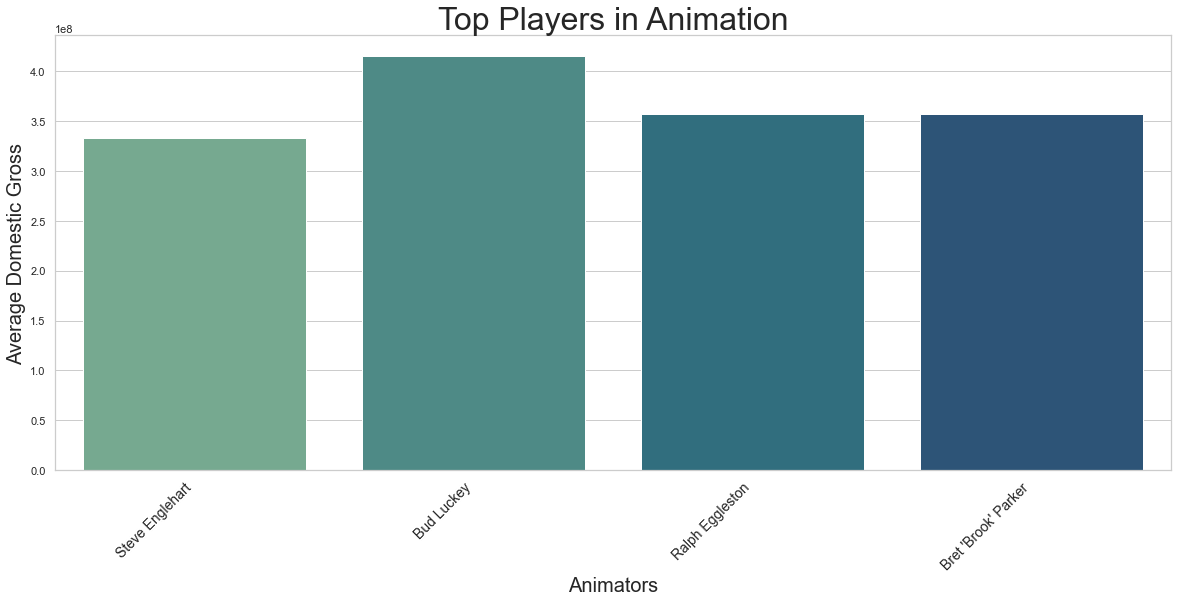

In [165]:
fig, ax = plt.subplots(figsize=(20,8))

g = sns.barplot(data=ad_df, x= 'primary_name', y='domestic_gross', palette = 'crest' )
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax.lines = []

plt.xlabel("Animators", fontsize=20)
plt.ylabel("Average Domestic Gross", fontsize=20)
plt.title('Top Players in Animation', fontsize=32)
plt.tight_layout
plt.show()

In [202]:
manager_df = df_filtered[df_filtered['primary_profession'] == 'production_manager']

In [203]:
manager_df.shape

(5, 23)

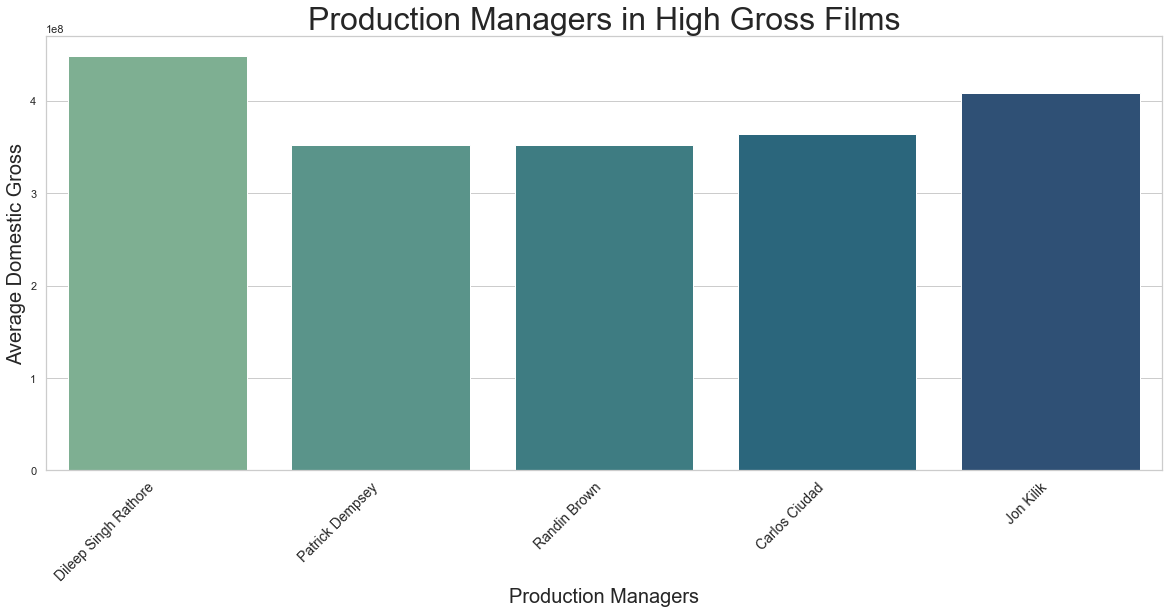

In [204]:
fig, ax = plt.subplots(figsize=(20,8))

g = sns.barplot(data=manager_df, x= 'primary_name', y='domestic_gross', palette = 'crest' )
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax.lines = []

plt.xlabel("Production Managers", fontsize=20)
plt.ylabel("Average Domestic Gross", fontsize=20)
plt.title('Production Managers in High Gross Films', fontsize=32)
plt.tight_layout
plt.show()

### Question 2

**Does a higher budget result in a higher rating?**

In [166]:
#I first just looked at Rating v Worldwide Gross, and truly did not see much of a relationship.

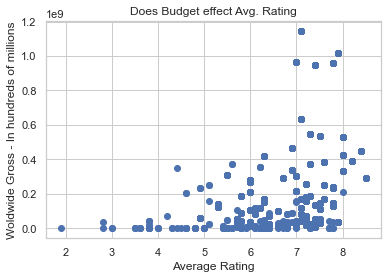

In [167]:
plt.scatter(x='averagerating', y='worldwide_gross', data=project1_df.iloc[0:1000])
plt.xlabel('Average Rating')
plt.ylabel('Woldwide Gross - In hundreds of millions')
plt.title('Does Budget effect Avg. Rating')
plt.show()

In [168]:
#So I broke it down by High, Mid, and Low grossing films and still did not see any relationship.

<ipython-input-169-db559261c069>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


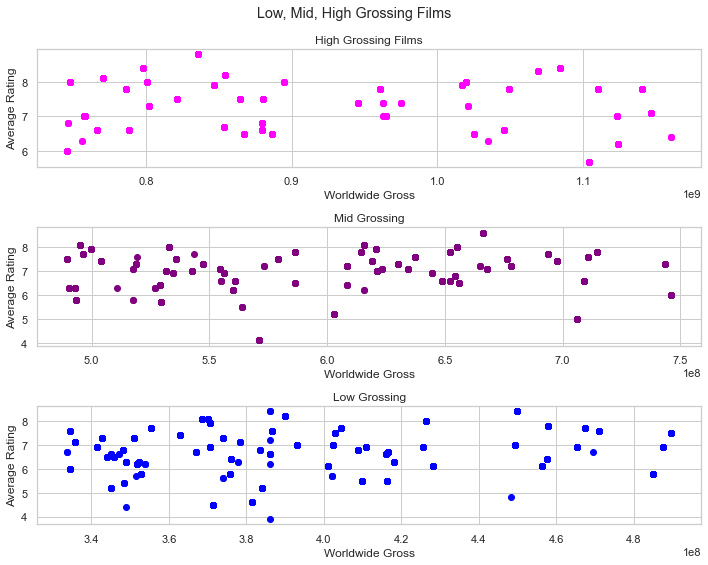

In [169]:
df1 = project1_df.sort_values('worldwide_gross', ascending = False)

fig, axs = plt.subplots(3, figsize = (10,8))
fig.suptitle("Low, Mid, High Grossing Films")


axs[0].scatter(x='worldwide_gross', y='averagerating', data=df1.iloc[0:750], color='magenta')
axs[1].scatter(x='worldwide_gross', y='averagerating', data=df1.iloc[751:1500], color='purple')
axs[2].scatter(x='worldwide_gross', y='averagerating', data=df1.iloc[1501:2250],color='blue')

axs[0].set_xlabel('Worldwide Gross')
axs[0].set_ylabel('Average Rating')
axs[0].set_title('High Grossing Films')

axs[1].set_xlabel('Worldwide Gross')
axs[1].set_ylabel('Average Rating')
axs[1].set_title('Mid Grossing')

axs[2].set_xlabel('Worldwide Gross')
axs[2].set_ylabel('Average Rating')
axs[2].set_title('Low Grossing')

fig.tight_layout()
fig.show()

In [170]:
#I added in the third value of Budget and finally found a relationship between worldwide gross and budget.  The budget does not have to be too large, but should still be in the range of 100-200 million.

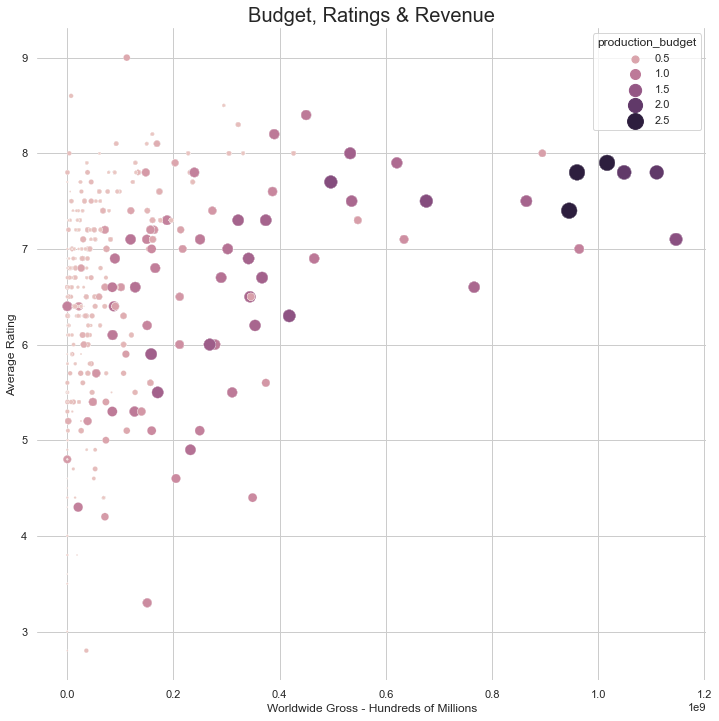

In [171]:
f, ax = plt.subplots(figsize=(12, 12))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="worldwide_gross", y="averagerating",
                hue="production_budget",
                size='production_budget',
                sizes=(1,250),
                data=project1_df.iloc[200:2000], ax=ax)

ax.set_title('Budget, Ratings & Revenue', fontsize=20)
ax.set_ylabel('Average Rating')
ax.set_xlabel('Worldwide Gross - Hundreds of Millions')
plt.savefig('png_1')
plt.show()

### Question 3 

Does the time of year effect the gross revenue?  
i.e. Are people staying indoors and going to the movies in the winter, is it more slow in the summer because people are outside, ext.?

In [208]:
project1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10744 entries, 10991 to 7375
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tconst              10744 non-null  object 
 1   primary_title       10744 non-null  object 
 2   original_title      10744 non-null  object 
 3   start_year          10744 non-null  float64
 4   runtime_minutes     10744 non-null  float64
 5   genres              10744 non-null  object 
 6   id                  10744 non-null  int64  
 7   release_date        10744 non-null  object 
 8   movie               10744 non-null  object 
 9   production_budget   10744 non-null  int64  
 10  domestic_gross      10744 non-null  int64  
 11  worldwide_gross     10744 non-null  int64  
 12  averagerating       10744 non-null  float64
 13  numvotes            10744 non-null  int64  
 14  nconst              10744 non-null  object 
 15  primary_name        10744 non-null  object 
 16  b

In [213]:
project1_df.month.unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

In [210]:
cats = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

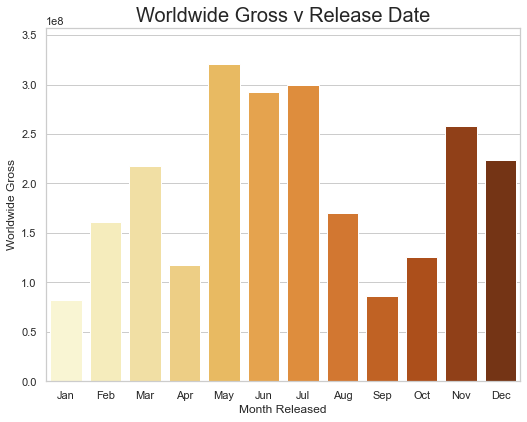

In [211]:
f, ax = plt.subplots(figsize=(8.5, 6.5))
sns.barplot(x="month", y="worldwide_gross", data=project1_df, 
            palette = "YlOrBr", order=cats)


ax.set_title('Worldwide Gross v Release Date', fontsize=20)
ax.set_ylabel('Worldwide Gross')
ax.set_xlabel('Month Released')
ax.lines = []
plt.savefig('png_2')
plt.show()

In [219]:
winter = ['Dec', 'Jan', 'Feb']
spring = ['Mar', 'Apr', 'May']
summer = ['Jun', 'Jul', 'Aug']
fall = ['Sep', 'Oct', 'Nov']

mask1 = project1_df.month.apply(lambda x: any(item for item in winter if item in x))
df1 = project1_df[mask1]
mask2 = project1_df.month.apply(lambda x: any(item for item in spring if item in x))
df2 = project1_df[mask2]
mask3 = project1_df.month.apply(lambda x: any(item for item in summer if item in x))
df3 = project1_df[mask3]
mask4 = project1_df.month.apply(lambda x: any(item for item in fall if item in x))
df4 = project1_df[mask4]

print(df1.month.unique())
print(df2.month.unique())
print(df3.month.unique())
print(df4.month.unique())

['Dec' 'Feb' 'Jan']
['May' 'Apr' 'Mar']
['Aug' 'Jul' 'Jun']
['Nov' 'Oct' 'Sep']


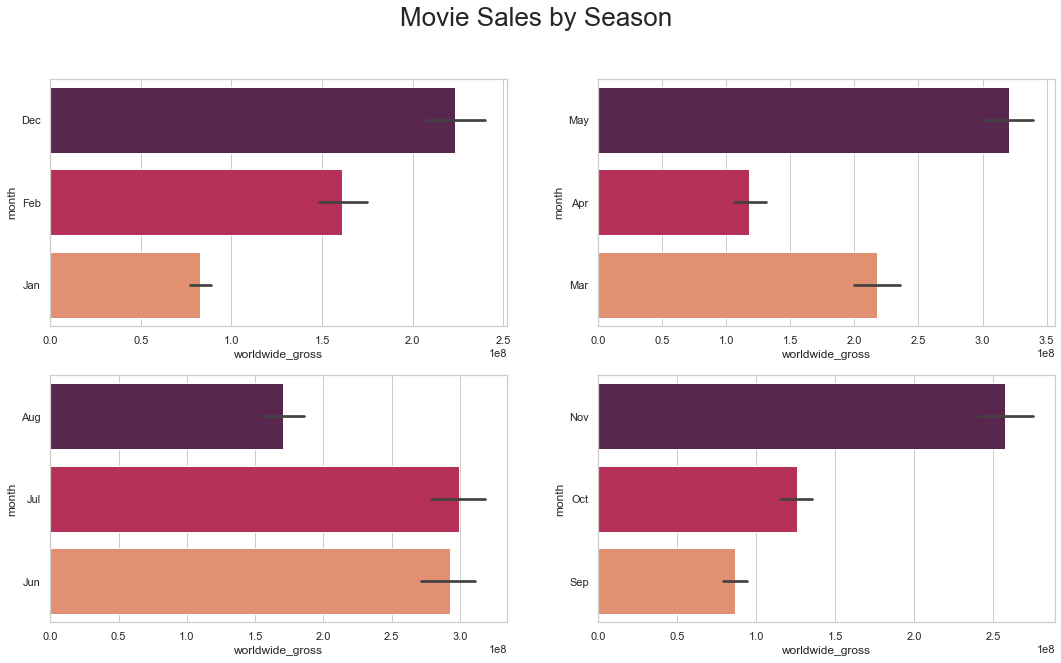

In [234]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Movie Sales by Season', fontsize = 26)

sns.barplot(ax=axes[0, 0], data=df1, y='month', x='worldwide_gross', palette = 'rocket')
sns.barplot(ax=axes[0, 1], data=df2, y='month', x='worldwide_gross', palette = 'rocket')
sns.barplot(ax=axes[1, 0], data=df3, y='month', x='worldwide_gross', palette = 'rocket')
sns.barplot(ax=axes[1, 1], data=df4, y='month', x='worldwide_gross', palette = 'rocket')
plt.lines = []

plt.tight_layout
plt.show()

In [174]:
#I think there is a clear relationship between holiday months and movie box office success.

### Question 4

Does worldwide gross make that much of a contribution to overall gross?

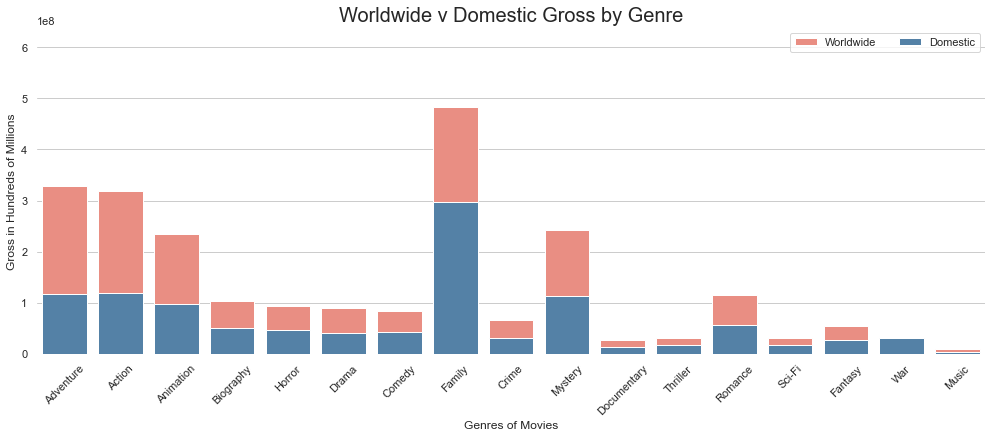

In [176]:
df = project1_df.sort_values('worldwide_gross', ascending = False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(17, 6))
# Plot the total gross and label domestic so when the boxes are layered it shows the remaining domestic gross.
sns.set_color_codes("pastel")
sns.barplot(x="1_genre", y="worldwide_gross", data=df,
            label="Worldwide", color="salmon")

# Plot worldwide gross over total
sns.set_color_codes("muted")
sns.barplot(x="1_genre", y="domestic_gross", data=df,
            label="Domestic", color="steelblue")

# Adding legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set( ylabel="Gross in Hundreds of Millions",
       xlabel="Genres of Movies")
sns.despine(left=True, bottom=True)
ax.set_title('Worldwide v Domestic Gross by Genre', fontsize=20)
ax.lines = []

plt.savefig('png_3')
plt.xticks(rotation=45)
plt.show()